# Multinomial regression

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc, classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel

File cereal.xlsx

Variables:

    age - age in years
    marital_status -  marital status (Married, Unmarried)
    lifestyle - lifestyle (Inactive, Active)
    breakfast - breakfast choice (Cereal, Oatmeal, Breakfast Bar)
    gender - gender (Female, Male)

In [99]:
df = pd.read_excel('cereal.xlsx')
df.head(25)

,age,marital_status,lifestyle,breakfast,gender
0,21,Married,Active,Breakfast Bar,Female
1,21,Married,Active,Breakfast Bar,Female
2,21,Married,Active,Breakfast Bar,Male
3,21,Married,Active,Breakfast Bar,Male
4,21,Married,Active,Breakfast Bar,Female
5,22,Married,Active,Breakfast Bar,Female
6,22,Married,Active,Breakfast Bar,Female
7,22,Married,Active,Breakfast Bar,Female
8,22,Married,Active,Breakfast Bar,Female
9,22,Married,Active,Breakfast Bar,Female


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             880 non-null    int64 
 1   marital_status  880 non-null    object
 2   lifestyle       880 non-null    object
 3   breakfast       880 non-null    object
 4   gender          880 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.5+ KB


In [101]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age']

Type: object
['marital_status' 'lifestyle' 'breakfast' 'gender']



In [102]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


### Dependent variable

In [103]:
df['breakfast'].value_counts()

Cereal           339
Oatmeal          310
Breakfast Bar    231
Name: breakfast, dtype: int64

### Independent variables

In [104]:
df['age'].describe()

count    880.000000
mean      49.885227
std       18.820311
min       21.000000
25%       33.000000
50%       51.000000
75%       67.000000
max       81.000000
Name: age, dtype: float64

In [105]:
df['marital_status'].value_counts() #reference group Unmarried

Married      577
Unmarried    303
Name: marital_status, dtype: int64

In [106]:
marital_status_dummies=pd.get_dummies(df.marital_status, prefix='marital_status', prefix_sep='_')
marital_status_dummies.head()

,marital_status_Married,marital_status_Unmarried
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [107]:
df['lifestyle'].value_counts() #reference group Inactive

Inactive    474
Active      406
Name: lifestyle, dtype: int64

In [108]:
lifestyle_dummies=pd.get_dummies(df.lifestyle, prefix='lifestyle', prefix_sep='_')
lifestyle_dummies.head()

,lifestyle_Active,lifestyle_Inactive
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [109]:
df['gender'].value_counts() #reference group Male

Female    456
Male      424
Name: gender, dtype: int64

In [110]:
gender_dummies=pd.get_dummies(df.gender, prefix='gender', prefix_sep='_')
gender_dummies.head()

,gender_Female,gender_Male
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [111]:
df = pd.concat([df, marital_status_dummies, lifestyle_dummies, gender_dummies], axis=1) 
df

,age,marital_status,lifestyle,breakfast,gender,marital_status_Married,marital_status_Unmarried,lifestyle_Active,lifestyle_Inactive,gender_Female,gender_Male
0,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
1,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
2,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1
3,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1
4,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
875,79,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1
876,80,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1
877,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0
878,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0


### Preliminary analysis of relationships between dependent variable and predictors

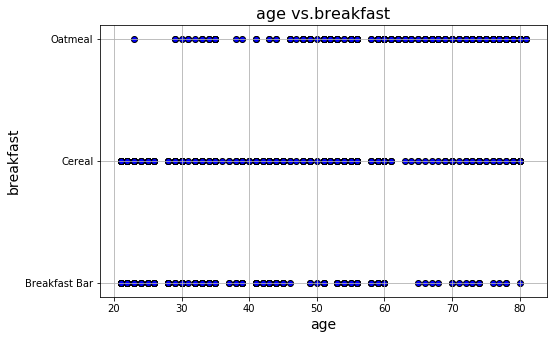

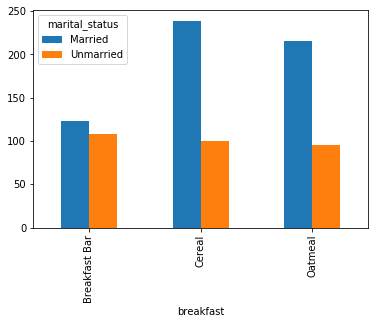

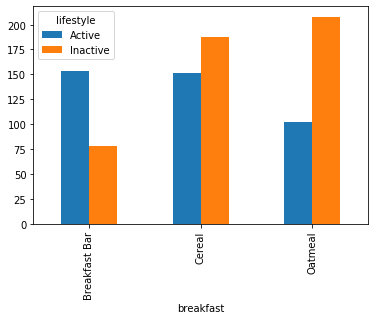

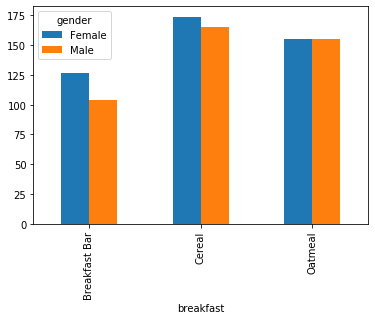

In [112]:
for c in df.columns:
    if c == 'age':
        plt.figure(figsize=(8,5))
        plt.title('{} vs.breakfast'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df.breakfast, color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('breakfast', fontsize=14)
        plt.show()
    elif c == 'marital_status' or c == 'lifestyle' or c=='gender':
        ct = pd.crosstab(df.breakfast, df[c])
        ct.plot.bar()

# Regression

https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [113]:
df_model1 = df.dropna(subset=['breakfast', 'age', 'marital_status_Married', 'lifestyle_Active', 'gender_Female'])
df_model1.shape

(880, 11)

In [114]:
df_model1.reset_index(drop=True, inplace=True)
df_model1

,age,marital_status,lifestyle,breakfast,gender,marital_status_Married,marital_status_Unmarried,lifestyle_Active,lifestyle_Inactive,gender_Female,gender_Male
0,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
1,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
2,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1
3,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1
4,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
875,79,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1
876,80,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1
877,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0
878,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0


In [115]:
x_mult = df_model1[['age', 'marital_status_Married', 'lifestyle_Active', 'gender_Female']]
y = df_model1['breakfast']
x_mult_constant = sm.add_constant(x_mult)

In [116]:
model1 = sm.MNLogit(y, x_mult_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.878740
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:              breakfast   No. Observations:                  880
Model:                        MNLogit   Df Residuals:                      870
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.1909
Time:                        14:41:17   Log-Likelihood:                -773.29
converged:                       True   LL-Null:                       -955.78
Covariance Type:            nonrobust   LLR p-value:                 5.733e-74
      breakfast=Cereal       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4326      0.313     -1.384      0.166      -1.045      

The model is statistically significant and explains 19% of the variability in the values of the dependent variable.

In [117]:
coefs = model1.params
coefs.columns = ['Cereal_VS_Breakfast_Bar', 'Outmeal_VS_Breakfast_Bar']
coefs

,Cereal_VS_Breakfast_Bar,Outmeal_VS_Breakfast_Bar
const,-0.432580,-4.582323
age,0.021073,0.092312
marital_status_Married,0.722492,1.023682
lifestyle_Active,-0.791888,-0.964191
gender_Female,-0.134973,-0.142028


In [118]:
coefs['OddsRatio_Cereal_VS_Breakfast_Bar'] = np.exp(coefs.Cereal_VS_Breakfast_Bar)
coefs['OddsRatio_Outmeal_VS_Breakfast_Bar'] = np.exp(coefs.Outmeal_VS_Breakfast_Bar)
coefs

,Cereal_VS_Breakfast_Bar,Outmeal_VS_Breakfast_Bar,OddsRatio_Cereal_VS_Breakfast_Bar,OddsRatio_Outmeal_VS_Breakfast_Bar
const,-0.432580,-4.582323,0.648833,0.010231
age,0.021073,0.092312,1.021296,1.096707
marital_status_Married,0.722492,1.023682,2.059560,2.783423
lifestyle_Active,-0.791888,-0.964191,0.452989,0.381292
gender_Female,-0.134973,-0.142028,0.873739,0.867597


### Interpreting the values of the regression coefficients

- One year age increase increases by 2% the chance of choosing Cereal instead of Breakfast bar.
- Gender does not affect the choice of breakfast.
- Active people are 55% less likely to choose Cereal instead of Breakfast bar.

### Confusion Matrix

In [119]:
cm = model1.pred_table()
cm

array([[ 84., 119.,  28.],
       [ 64., 183.,  92.],
       [  7.,  82., 221.]])

In [120]:
pd.DataFrame(cm, index=['1-st','2-nd', '3-rd'],
columns=['predicted_1-st', 'predicted_2-nd', 'predicted_3-rd'])

,predicted_1-st,predicted_2-nd,predicted_3-rd
1-st,84.0,119.0,28.0
2-nd,64.0,183.0,92.0
3-rd,7.0,82.0,221.0


In [121]:
accuracy = np.diag(cm).sum()/cm.sum()
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.5545454545454546


### Saving the predicted probabilities of each event for each observation

In [122]:
predicted = pd.DataFrame(model1.predict())
predicted.columns = ['1', '2', '3']
predicted

,1,2,3
0,0.529445,0.435897,0.034657
1,0.529445,0.435897,0.034657
2,0.495606,0.467001,0.037393
3,0.495606,0.467001,0.037393
4,0.529445,0.435897,0.034657
...,...,...,...
875,0.051381,0.176167,0.772452
876,0.047644,0.166831,0.785526
877,0.054454,0.166604,0.778942
878,0.054454,0.166604,0.778942


In [123]:
#the sum of the three probabilities is 1
predicted['1'] + predicted ['2'] + predicted ['3']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
875    1.0
876    1.0
877    1.0
878    1.0
879    1.0
Length: 880, dtype: float64

In [124]:
predicted['predicted_group'] = predicted.idxmax(axis=1)
predicted
#predicted value of the dependent variable 

,1,2,3,predicted_group
0,0.529445,0.435897,0.034657,1
1,0.529445,0.435897,0.034657,1
2,0.495606,0.467001,0.037393,1
3,0.495606,0.467001,0.037393,1
4,0.529445,0.435897,0.034657,1
...,...,...,...,...
875,0.051381,0.176167,0.772452,3
876,0.047644,0.166831,0.785526,3
877,0.054454,0.166604,0.778942,3
878,0.054454,0.166604,0.778942,3


In [125]:
res = pd.concat([df_model1, predicted['predicted_group']], axis=1)
res #add the predicted value to the original dataframe

,age,marital_status,lifestyle,breakfast,gender,marital_status_Married,marital_status_Unmarried,lifestyle_Active,lifestyle_Inactive,gender_Female,gender_Male,predicted_group
0,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0,1
1,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0,1
2,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1,1
3,21,Married,Active,Breakfast Bar,Male,1,0,1,0,0,1,1
4,21,Married,Active,Breakfast Bar,Female,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
875,79,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1,3
876,80,Unmarried,Inactive,Oatmeal,Male,0,1,0,1,0,1,3
877,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0,3
878,80,Unmarried,Inactive,Oatmeal,Female,0,1,0,1,1,0,3


In [126]:
res[['breakfast', 'predicted_group']].tail(70)
#display real and predicted values

,breakfast,predicted_group
810,Oatmeal,3
811,Oatmeal,3
812,Oatmeal,3
813,Oatmeal,2
814,Oatmeal,2
...,...,...
875,Oatmeal,3
876,Oatmeal,3
877,Oatmeal,3
878,Oatmeal,3


# Ordinal regression

https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html?highlight=ordinal

https://www.statsmodels.org/devel/generated/statsmodels.miscmodels.ordinal_model.OrderedResults.html#statsmodels.miscmodels.ordinal_model.OrderedResults

File plan.xlsx

Variables:

    gender - gender (male, female)
    age - age in years
    duration - duration of illness in years
    educ - level of education (primary school, secondary school, high school)
    plan - agree with the need for planning the treatment:
        - absolutely disagree (AD)
        - rather disagree (RD)
        - neutral (N)
        - rather agree (RA)
        - absolutely agree (AA)

In [127]:
df = pd.read_excel('plan.xlsx')
df.head(25)

,gender,age,duration,educ,plan
0,female,27,4,secondary school,neutral
1,female,40,4,primary school,absolutely agree
2,male,38,4,primary school,rather agree
3,female,35,1,secondary school,rather disagree
4,female,35,1,primary school,rather agree
5,male,33,2,primary school,rather disagree
6,female,29,2,secondary school,rather agree
7,female,30,2,primary school,neutral
8,female,44,1,primary school,rather disagree
9,female,46,3,primary school,absolutely disagree


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    85 non-null     object
 1   age       85 non-null     int64 
 2   duration  85 non-null     int64 
 3   educ      85 non-null     object
 4   plan      85 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.4+ KB


## Dependent Variable

In [129]:
df['plan'].value_counts()

absolutely disagree    24
neutral                18
rather disagree        18
rather agree           16
absolutely agree        9
Name: plan, dtype: int64

In [130]:
def plan_recode(x):
    if x=='absolutely disagree':
        return 1
    elif x=='rather disagree':
        return 2
    elif x=='neutral':
        return 3
    elif x=='rather agree':
        return 4
    elif x=='absolutely agree':
        return 5

In [131]:
df['plan_num'] = df['plan'].apply(plan_recode)
df.head()

,gender,age,duration,educ,plan,plan_num
0,female,27,4,secondary school,neutral,3
1,female,40,4,primary school,absolutely agree,5
2,male,38,4,primary school,rather agree,4
3,female,35,1,secondary school,rather disagree,2
4,female,35,1,primary school,rather agree,4


In [132]:
df['plan_num'].value_counts()

1    24
3    18
2    18
4    16
5     9
Name: plan_num, dtype: int64

## Independent Variables

In [133]:
df['gender']=df['gender'].replace('male', 1)
df['gender']=df['gender'].replace('female', 0) #reference group
df['gender'].value_counts()

1    44
0    41
Name: gender, dtype: int64

In [134]:
df

,gender,age,duration,educ,plan,plan_num
0,0,27,4,secondary school,neutral,3
1,0,40,4,primary school,absolutely agree,5
2,1,38,4,primary school,rather agree,4
3,0,35,1,secondary school,rather disagree,2
4,0,35,1,primary school,rather agree,4
...,...,...,...,...,...,...
80,0,58,8,high school,rather disagree,2
81,0,59,8,secondary school,rather disagree,2
82,1,56,9,high school,rather disagree,2
83,1,74,9,primary school,neutral,3


In [135]:
df['age'].describe()

count    85.000000
mean     47.894118
std      14.227759
min      25.000000
25%      37.000000
50%      46.000000
75%      57.000000
max      80.000000
Name: age, dtype: float64

In [136]:
df['duration'].describe()

count    85.000000
mean     11.505882
std       7.572858
min       1.000000
25%       4.000000
50%      12.000000
75%      18.000000
max      30.000000
Name: duration, dtype: float64

In [137]:
df['educ'].value_counts() #high school - reference group

primary school      53
secondary school    18
high school         14
Name: educ, dtype: int64

In [138]:
educ_dummies=pd.get_dummies(df.educ, prefix='educ', prefix_sep='_')
educ_dummies.head()

,educ_high school,educ_primary school,educ_secondary school
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [139]:
df = pd.concat([df, educ_dummies], axis=1) 
df

,gender,age,duration,educ,plan,plan_num,educ_high school,educ_primary school,educ_secondary school
0,0,27,4,secondary school,neutral,3,0,0,1
1,0,40,4,primary school,absolutely agree,5,0,1,0
2,1,38,4,primary school,rather agree,4,0,1,0
3,0,35,1,secondary school,rather disagree,2,0,0,1
4,0,35,1,primary school,rather agree,4,0,1,0
...,...,...,...,...,...,...,...,...,...
80,0,58,8,high school,rather disagree,2,1,0,0
81,0,59,8,secondary school,rather disagree,2,0,0,1
82,1,56,9,high school,rather disagree,2,1,0,0
83,1,74,9,primary school,neutral,3,0,1,0


# Regression

In [140]:
mod_log = OrderedModel(df['plan_num'],
                        df[['gender', 'age', 'duration', 'educ_primary school', 'educ_secondary school']],
                        distr='logit')

res_log = mod_log.fit(method='bfgs')
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 1.483696
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
                             OrderedModel Results                             
Dep. Variable:               plan_num   Log-Likelihood:                -126.11
Model:                   OrderedModel   AIC:                             270.2
Method:            Maximum Likelihood   BIC:                             292.2
Date:                Thu, 05 May 2022                                         
Time:                        14:41:41                                         
No. Observations:                  85                                         
Df Residuals:                      76                                         
Df Model:                           9                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [141]:
predicted = res_log.model.predict(res_log.params, exog=df[['gender', 'age', 'duration', 'educ_primary school', 'educ_secondary school']])
predicted

C:\Users\amelikyan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.13393676, 0.16880539, 0.24855556, 0.27653825, 0.17216404],
       [0.33455847, 0.25076775, 0.2144452 , 0.14010342, 0.06012516],
       [0.43970585, 0.24811698, 0.17395672, 0.09885107, 0.03936938],
       [0.17488562, 0.19818328, 0.25433971, 0.24084072, 0.13175068],
       [0.33681671, 0.25096529, 0.21360614, 0.1390564 , 0.05955545],
       [0.43174949, 0.24908284, 0.17704721, 0.1015088 , 0.04061166],
       [0.14998985, 0.18129838, 0.25237382, 0.26216981, 0.15416814],
       [0.30209613, 0.24649508, 0.22613085, 0.15611514, 0.06916279],
       [0.38549055, 0.25235114, 0.19504115, 0.11834759, 0.04876957],
       [0.37651934, 0.25248971, 0.19851169, 0.12191434, 0.05056492],
       [0.17333628, 0.19721602, 0.25433411, 0.24212548, 0.13298811],
       [0.38204408, 0.25242442, 0.19637602, 0.11970537, 0.04945011],
       [0.39879715, 0.25183904, 0.18987359, 0.1132463 , 0.04624392],
       [0.5156743 , 0.23365419, 0.14495137, 0.07639868, 0.02932147],
       [0.5156743 , 0.23365419, 0.

# Confusion Matrix

In [142]:
cm = res_log.pred_table()
cm

row_0,0,1,2,3,4,All
col_0,,,,,,
0,21.0,0.0,3.0,0.0,0.0,24.0
1,12.0,0.0,4.0,2.0,0.0,18.0
2,9.0,0.0,4.0,5.0,0.0,18.0
3,6.0,0.0,2.0,7.0,1.0,16.0
4,5.0,0.0,1.0,3.0,0.0,9.0
All,53.0,0.0,14.0,17.0,1.0,85.0


### Saving the predicted probabilities of each event for each observation

In [143]:
predicted_probabilities = pd.DataFrame(predicted)
predicted_probabilities.columns = ['AD', 'RD', 'N', 'RA', 'AA']
predicted_probabilities

,AD,RD,N,RA,AA
0,0.133937,0.168805,0.248556,0.276538,0.172164
1,0.334558,0.250768,0.214445,0.140103,0.060125
2,0.439706,0.248117,0.173957,0.098851,0.039369
3,0.174886,0.198183,0.254340,0.240841,0.131751
4,0.336817,0.250965,0.213606,0.139056,0.059555
...,...,...,...,...,...
80,0.115869,0.153106,0.241113,0.292858,0.197054
81,0.216600,0.220418,0.250151,0.208628,0.104203
82,0.163919,0.191103,0.253988,0.250062,0.140928
83,0.596289,0.209416,0.115768,0.057216,0.021311


In [144]:
#the sum of all the probabilities is 1
predicted_probabilities['AD'] + predicted_probabilities['RD'] + predicted_probabilities['N'] + predicted_probabilities['RA'] + predicted_probabilities['AA']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
80    1.0
81    1.0
82    1.0
83    1.0
84    1.0
Length: 85, dtype: float64

In [145]:
predicted_probabilities['predicted_group'] = predicted_probabilities.idxmax(axis=1)
predicted_probabilities
#predicted value of the dependent variable

,AD,RD,N,RA,AA,predicted_group
0,0.133937,0.168805,0.248556,0.276538,0.172164,RA
1,0.334558,0.250768,0.214445,0.140103,0.060125,AD
2,0.439706,0.248117,0.173957,0.098851,0.039369,AD
3,0.174886,0.198183,0.254340,0.240841,0.131751,N
4,0.336817,0.250965,0.213606,0.139056,0.059555,AD
...,...,...,...,...,...,...
80,0.115869,0.153106,0.241113,0.292858,0.197054,RA
81,0.216600,0.220418,0.250151,0.208628,0.104203,N
82,0.163919,0.191103,0.253988,0.250062,0.140928,N
83,0.596289,0.209416,0.115768,0.057216,0.021311,AD


In [146]:
res = pd.concat([df, predicted_probabilities['predicted_group']], axis=1)
res #add the predicted value to the original dataframe

,gender,age,duration,educ,plan,plan_num,educ_high school,educ_primary school,educ_secondary school,predicted_group
0,0,27,4,secondary school,neutral,3,0,0,1,RA
1,0,40,4,primary school,absolutely agree,5,0,1,0,AD
2,1,38,4,primary school,rather agree,4,0,1,0,AD
3,0,35,1,secondary school,rather disagree,2,0,0,1,N
4,0,35,1,primary school,rather agree,4,0,1,0,AD
...,...,...,...,...,...,...,...,...,...,...
80,0,58,8,high school,rather disagree,2,1,0,0,RA
81,0,59,8,secondary school,rather disagree,2,0,0,1,N
82,1,56,9,high school,rather disagree,2,1,0,0,N
83,1,74,9,primary school,neutral,3,0,1,0,AD


In [147]:
res[['plan', 'predicted_group']].head(70)
#display real and predicted values

,plan,predicted_group
0,neutral,RA
1,absolutely agree,AD
2,rather agree,AD
3,rather disagree,N
4,rather agree,AD
...,...,...
65,absolutely disagree,AD
66,rather disagree,AD
67,neutral,RA
68,absolutely disagree,AD
